# 配置环境
```dotnetcli
python=3.10
torch==2.1.0
cuda=11.8
```
在安装d2l时出现报错
```dotnetcli
pip install d2l==0.17.6
```
出现了问题：ERROR: Could not build wheels for pandas, which is required to install pyproject.toml-based projects

修改为
 ```dotnetcli
 pip install d2l==0.17.0
```

 


# 2.1 数据操作
### 1.将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

In [6]:
import torch
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
X,Y


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [7]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [8]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [9]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

### 2.⽤其他形状（例如三维张量）替换⼴播机制中按元素操作的两个张量。结果是否与预期相同？

# 2.2 数据预处理
创建包含更多⾏和列的原始数据集
1.删除缺失值最多的列
2.将预处理后的数据集转换为张量格式

In [10]:
a = torch.arange(24).reshape((2,3,4))
b = torch.arange(12).reshape((3,4))
a,b

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [11]:
a + b

tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]],

        [[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]])

In [13]:
c = torch.arange(4).reshape((1,4))
c,a + c

(tensor([[0, 1, 2, 3]]),
 tensor([[[ 0,  2,  4,  6],
          [ 4,  6,  8, 10],
          [ 8, 10, 12, 14]],
 
         [[12, 14, 16, 18],
          [16, 18, 20, 22],
          [20, 22, 24, 26]]]))

In [17]:
import os
import pandas as pd

os.makedirs(os.path.join('..','my_data'),exist_ok=True)
data_file = os.path.join('..','my_data','vegetable.csv')
with open(data_file,'w') as f:
    f.write('Number,variety,Price,taste\n')
    f.write('3,tomato,2.00,delicious\n')
    f.write('NA,tomato,4,delicous\n')
    f.write('4,tomato,5,sour\n')
    f.write('NA,NA,3,sour\n')
    f.write('NA,NA,6,delicious\n')
data = pd.read_csv(data_file)
print(data)

   Number variety  Price      taste
0     3.0  tomato    2.0  delicious
1     NaN  tomato    4.0   delicous
2     4.0  tomato    5.0       sour
3     NaN     NaN    3.0       sour
4     NaN     NaN    6.0  delicious


In [23]:
# 删除缺失值最多的一列，删除number这一列
new_data = data.iloc[:,1:4]
print(new_data)
inputs,outputs=new_data.iloc[:,0:2],new_data.iloc[:,2]
print(inputs)
print(outputs)

  variety  Price      taste
0  tomato    2.0  delicious
1  tomato    4.0   delicous
2  tomato    5.0       sour
3     NaN    3.0       sour
4     NaN    6.0  delicious
  variety  Price
0  tomato    2.0
1  tomato    4.0
2  tomato    5.0
3     NaN    3.0
4     NaN    6.0
0    delicious
1     delicous
2         sour
3         sour
4    delicious
Name: taste, dtype: object


In [30]:
#variety分为两类
inputs = pd.get_dummies(inputs,dummy_na=True,dtype=float)
print(inputs)
# outputs = pd.get_dummies(outputs,dummy_na=True,dtype=float)
# print(outputs)

   Price  variety_tomato  variety_nan
0    2.0             1.0          0.0
1    4.0             1.0          0.0
2    5.0             1.0          0.0
3    3.0             0.0          1.0
4    6.0             0.0          1.0


In [34]:
#转换为张量形式
X,y = torch.tensor(inputs.values),torch.tensor(outputs.values)
X,y


(tensor([[2., 1., 0.],
         [4., 1., 0.],
         [5., 1., 0.],
         [3., 0., 1.],
         [6., 0., 1.]], dtype=torch.float64),
 tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.]], dtype=torch.float64))

# 2.3 线性代数
### 4.定义了形状（2,3,4）的张量X。len(x)的输出结果是

In [37]:
X = torch.arange(24).reshape(2,3,4)
print(X)
len(X)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


2

### 5.对于任意形状的张量X,len(X)是否总是对应于X特定轴的⻓度?这个轴是什么?
axis=0
### 6.运⾏A/A.sum(axis=1)，看看会发⽣什么。请分析⼀下原因

In [39]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
print(A)


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])


In [40]:
A.sum(axis=1)

tensor([ 6., 22., 38., 54., 70.])

In [41]:
print(A/A.sum(axis=1))

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

A.sum(axis=1)有5列，而A只有4列

In [42]:
B = A.sum(axis=1,keepdims=True)
print(A/B)

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])


### 7.考虑⼀个具有形状(2，3， 4)的张量，在轴0、1、2上的求和输出是什么形状

In [44]:
X_sumaxis0 = X.sum(axis=0)
X_sumaxis1 = X.sum(axis=1)
X_sumaxis2 = X.sum(axis=2)

print(X_sumaxis0.shape)
print(X_sumaxis1.shape)
print(X_sumaxis2.shape)

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


### 8.为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么
```dotnetcli
torch.linalg.norm(A, ord=None, dim=None, keepdim=False, *, out=None, dtype=None)
```



In [49]:
Y = torch.arange(60).reshape(3,4,5).float()
Y

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]],

        [[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34.],
         [35., 36., 37., 38., 39.]],

        [[40., 41., 42., 43., 44.],
         [45., 46., 47., 48., 49.],
         [50., 51., 52., 53., 54.],
         [55., 56., 57., 58., 59.]]])

In [52]:
y_norm = torch.linalg.norm(Y)
print(y_norm)
y_norm1 = torch.linalg.norm(Y,dim=(1,2))
print(y_norm1)

tensor(264.9717)
tensor([ 49.6991, 134.4247, 222.8677])


# 2.4 微积分
### 1. 绘制函数y = f (x) = x3 

C:\Users\24762\AppData\Local\Temp\ipykernel_34060\2096973030.py:6: RuntimeWarning: divide by zero encountered in divide
  return x**3 - 1/x


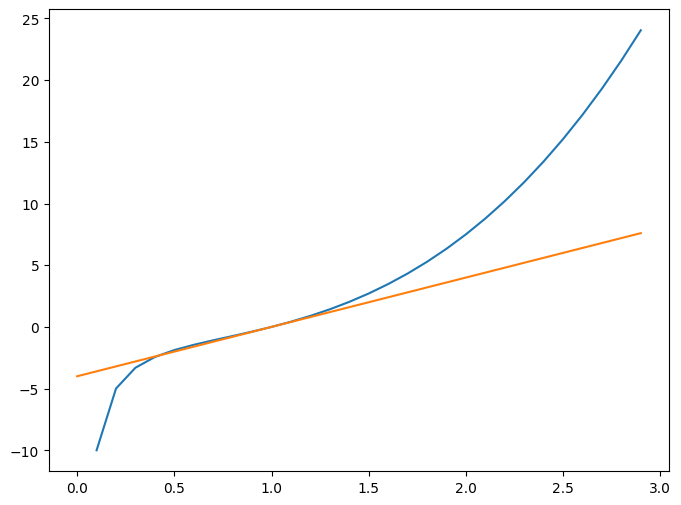

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

def f(x):
    return x**3 - 1/x
def df(x):
    return 3*x**2 + 1/x**2
x = np.arange(0,3,0.1) #定义x的范围
y = f(x)
dfx = df(1)*(x-1)+f(1) 
# 创建图像
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="y = f(x) = $x^3 - 1/x$")
plt.plot(x, dfx, label="gradient at x=1")



# 2.5 自动微分

In [58]:
# 反向传播函数
x = torch.arange(4.0)
x.requires_grad_(True)
x.grad
y = 2*torch.dot(x,x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [56]:
#再进行一次反向传播
y.backward(retain_graph=True)
x.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

### 3.在控制流的例⼦中，我们计算d关于a的导数，如果将变量a更改为随机向量或矩阵，会发⽣什么

In [62]:
def f(a):
    b = a ** 2
    while b.norm() <1000:
        b = b *2
    if b.sum()>0:
        c = b
    else:
        c = 100 *b
    return c
a = torch.randn(size=(5,4),requires_grad=True) #更换为矩阵
d = f(a)
d.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

### 4.重新设计⼀个求控制流梯度的例⼦，运⾏并分析结果

In [68]:
def f(a):
    b = 3 * a**3 - 2*a
    while b.norm()<1000:
        b = b * 3
    c = b /2
    return c
a = torch.randn(size=(),requires_grad=True)
print(a)
d = f(a)
d.backward()
a.grad

tensor(1.1858, requires_grad=True)


tensor(3883.5127)